# Building a LAS file from scratch

In [1]:
import lasio

import datetime
import numpy
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1

Create some fake data, and make some of the values at the bottom NULL (``numpy.nan``). Note that of course every curve in a LAS file is recorded against a reference/index, either depth or time, so we create that array too.

In [2]:
depths = numpy.arange(10, 50, 0.5)
fake_curve = numpy.random.random(len(depths))
fake_curve[-10:] = numpy.nan   # Add some null values at the bottom

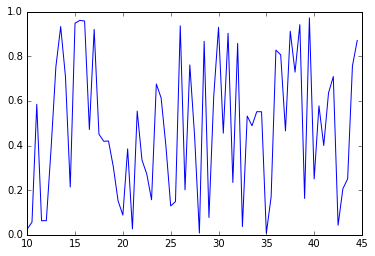

In [3]:
plt.plot(depths, fake_curve)

## Step 2

Create an empty LASFile object and review its header section

In [4]:
l = lasio.LASFile()

In [5]:
l.header

{'Curves': [],
 'Other': '',
 'Parameter': [],
 'Version': [HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS log ASCII Standard -VERSION 2.0, original_mnemonic=VERS),
  HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step, original_mnemonic=WRAP),
  HeaderItem(mnemonic=DLM, unit=, value=SPACE, descr=Column Data Section Delimiter, original_mnemonic=DLM)],
 'Well': [HeaderItem(mnemonic=STRT, unit=m, value=nan, descr=START DEPTH, original_mnemonic=STRT),
  HeaderItem(mnemonic=STOP, unit=m, value=nan, descr=STOP DEPTH, original_mnemonic=STOP),
  HeaderItem(mnemonic=STEP, unit=m, value=nan, descr=STEP, original_mnemonic=STEP),
  HeaderItem(mnemonic=NULL, unit=, value=-9999.25, descr=NULL VALUE, original_mnemonic=NULL),
  HeaderItem(mnemonic=COMP, unit=, value=, descr=COMPANY, original_mnemonic=COMP),
  HeaderItem(mnemonic=WELL, unit=, value=, descr=WELL, original_mnemonic=WELL),
  HeaderItem(mnemonic=FLD, unit=, value=, descr=FIELD, original_mnemonic=FLD),
  Header

Let's add some information to the header: 

- the date
- the operator (in the Parameter section)
- a description of the file in the Other section.

First, let's change the date.

In [6]:
l.well.DATE = str(datetime.datetime.today())

Next, let's make a new item in the ~Parameters section for the operator. To do this we need to make a new ``HeaderItem``:

In [7]:
l.params['ENGI'] = lasio.HeaderItem("ENGI", "", "kinverarity@hotmail.com", "Creator of this file...")

And finally, add some free text to the ~Other section:

In [8]:
l.other = "Example of how to create a LAS file from scratch using lasio"

## Step 3

Add the curves to the LAS file using the ``add_curve`` method:

In [9]:
l.add_curve('DEPT', depths, unit='m')
l.add_curve('FAKE_CURVE', fake_curve, descr='fake curve')

## Step 4

Now let's write out two files: one according to the LAS file specification version 1.2, and one according to 2.0. Note that by default an empty ``LASFile`` object is version 2.0.

In [10]:
fn = "scratch_example_v2.las"
with open(fn, mode="w") as f: # Write LAS file to disk
    l.write(f)

and let's see if that worked

In [11]:
with open(fn, mode="r") as f: # Show the result... 
    print(f.read())

~Version ---------------------------------------------------
VERS.   2.0 : CWLS log ASCII Standard -VERSION 2.0
WRAP.    NO : One line per depth step
DLM . SPACE : Column Data Section Delimiter
~Well ------------------------------------------------------
STRT.m                      10.0 : START DEPTH
STOP.m                      49.5 : STOP DEPTH
STEP.m                       0.5 : STEP
NULL.                   -9999.25 : NULL VALUE
COMP.                            : COMPANY
WELL.                            : WELL
FLD .                            : FIELD
LOC .                            : LOCATION
PROV.                            : PROVINCE
CNTY.                            : COUNTY
STAT.                            : STATE
CTRY.                            : COUNTRY
SRVC.                            : SERVICE COMPANY
DATE. 2016-02-13 16:52:39.445000 : DATE
UWI .                            : UNIQUE WELL ID
API .                            : API NUMBER
~Curves ---------------------------------

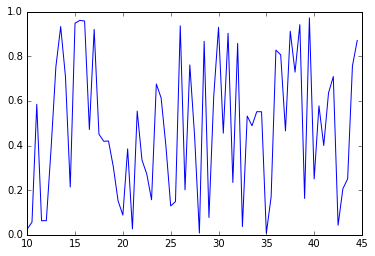

In [13]:
plt.plot(l['DEPT'], l['FAKE_CURVE'])

In [14]:
os.remove(fn)